## **Imports**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

## **Classe Knapsack**

In [32]:
import numpy as np

class Knapsack:
	def __init__(self,weight, weight_items, values, number_items):
		self.__weight = weight
		self.__weight_items = weight_items
		self.__values = values
		self.__number_items = number_items

	def get_weight(self):
		return self.__weight

	def get_weight_items(self):
		return self.__weight_items
	
	def get_values(self):
		return self.__values

	def get_number_items(self):
		return self.__number_items

	'''Knapsack guloso, ordena de forma decrescente os valores e os pesos dos items'''
	def fat_decrescent(self):
		self.get_values().sort(reverse=True)
		self.get_weight_items().sort(reverse=True)
		k = []
		result = []
		for i in range(self.get_number_items()):
			if self.get_weight_items()[i] <self.get_weight() and sum(k) < self.get_weight(): 
				k.append(self.get_weight_items()[i])
				result.append(self.get_values()[i])
		return sum(result)

	'''Knapsack guloso, ordena de forma crescente os valores e os pesos dos items'''
	def fat_crescent(self):
		self.get_values().sort(reverse=False)
		self.get_weight_items().sort(reverse=False)
		k = []
		result = []
		for i in range(self.get_number_items()):
			if self.get_weight_items()[i]<self.get_weight() and sum(k) < self.get_weight():
				k.append(self.get_weight_items()[i])
				result.append(self.get_values()[i])
		return sum(result)

	'''Knapsack guloso, utiliza a eficiência, a partir da razão "valor/peso" para selecionar os itens'''
	def fat_efficiency(self):
		value_efficiency = np.array(self.get_values())
		weight_items_efficiency = np.array(self.get_weight_items())
		efficiency = value_efficiency/weight_items_efficiency
		efficiency = list(efficiency)

		k = []
		result = []
		while True:
			index = efficiency.index(max(efficiency))
			if self.get_weight_items()[index]<self.get_weight() and sum(k)<self.get_weight():
				efficiency.pop(index)
				k.append(self.get_weight_items().pop(index))
				result.append(self.get_values().pop(index))
			else: break			
		return sum(result)		

## **Funções para pegar os resultados**

In [33]:
from os import listdir
from os.path import isfile, join
from time import time
from knapsack import Knapsack

def get_instances(directory):
	return [f for f in listdir(directory) if isfile(join(directory, f))]

def get_results(directory):	
	all_results_decrescent = []
	all_results_crescent = []
	all_results_efficiency = []
	for input_file in get_instances(directory): 
		with open(directory+input_file) as file: instance = list(map(lambda line:line.split(),file.read().splitlines()))	
		state = 0
		weigth = []
		value = []
		for inst in instance:
			if state == 0:
				n = int(inst[0])
				state = 1
			elif state == 1:			
				value.append(int(inst[1]))
				weigth.append(int(inst[2]))
				item_id = int(inst[0])
				if item_id == n: state = 2
			elif state == 2:
				w = int(inst[0])
		k = Knapsack(w, weigth, value, n)

		start = time()
		result_decrescent = k.fat_decrescent()
		all_results_decrescent.append((input_file,result_decrescent, '{0:.5}'.format(time()-start)))
		
		start = time()
		result_crescent = k.fat_crescent()
		all_results_crescent.append((input_file,result_crescent, '{0:.5}'.format(time()-start)))

		start = time()
		result_efficiency = k.fat_efficiency()
		all_results_efficiency.append((input_file,result_efficiency, '{0:.5}'.format(time()-start)))
	return all_results_decrescent, all_results_crescent, all_results_efficiency

## **Main**

In [34]:
from result import get_results

if __name__ == "__main__":
	directory = '../entradas/'

	decrescent = get_results(directory)[0]
	crescent = get_results(directory)[1]
	efficiency = get_results(directory)[2]


	print('DECRESCENTE: {}\n'.format(decrescent))
	print('CRESCENTE: {}\n'.format(crescent))
	print('EFICIENTE: {}\n'.format(efficiency))

DECRESCENTE: [('input5.in', 21019, '0.00056696'), ('input3.in', 39665, '0.00024295'), ('input10.in', 39897, '0.0004766'), ('input11.in', 59836, '0.00027061'), ('input6.in', 64727, '0.00053978'), ('input4.in', 39578, '9.6321e-05'), ('input14.in', 20820, '0.0063825'), ('input15.in', 20676, '0.00082421'), ('input8.in', 1017, '0.00037551'), ('input1.in', 12840, '2.5749e-05'), ('input16.in', 3995, '0.0010598'), ('input13.in', 59990, '0.0048752'), ('input12.in', 49988, '0.010272'), ('input2.in', 19687, '3.4809e-05'), ('input9.in', 19976, '0.00033855'), ('input7.in', 2129, '0.00019217')]

CRESCENTE: [('input5.in', 7725, '6.175e-05'), ('input3.in', 50044, '3.314e-05'), ('input10.in', 20378, '6.1035e-05'), ('input11.in', 31633, '5.8651e-05'), ('input6.in', 22, '0.00011754'), ('input4.in', 26157, '3.3379e-05'), ('input14.in', 0, '0.0064747'), ('input15.in', 0, '0.00067878'), ('input8.in', 761, '0.00028419'), ('input1.in', 11928, '1.3828e-05'), ('input16.in', 1657, '0.00074601'), ('input13.in', 4

In [35]:
decrescent.sort(key=lambda x:int(x[0].strip('input.in')))

In [36]:
crescent.sort(key=lambda x:int(x[0].strip('input.in')))

In [37]:
efficiency.sort(key=lambda x:int(x[0].strip('input.in')))

In [38]:
print('DECRESCENTE: {}\n'.format(decrescent))
print('CRESCENTE: {}\n'.format(crescent))
print('EFICIENTE: {}\n'.format(efficiency))

DECRESCENTE: [('input1.in', 12840, '2.5749e-05'), ('input2.in', 19687, '3.4809e-05'), ('input3.in', 39665, '0.00024295'), ('input4.in', 39578, '9.6321e-05'), ('input5.in', 21019, '0.00056696'), ('input6.in', 64727, '0.00053978'), ('input7.in', 2129, '0.00019217'), ('input8.in', 1017, '0.00037551'), ('input9.in', 19976, '0.00033855'), ('input10.in', 39897, '0.0004766'), ('input11.in', 59836, '0.00027061'), ('input12.in', 49988, '0.010272'), ('input13.in', 59990, '0.0048752'), ('input14.in', 20820, '0.0063825'), ('input15.in', 20676, '0.00082421'), ('input16.in', 3995, '0.0010598')]

CRESCENTE: [('input1.in', 11928, '1.3828e-05'), ('input2.in', 31455, '2.8849e-05'), ('input3.in', 50044, '3.314e-05'), ('input4.in', 26157, '3.3379e-05'), ('input5.in', 7725, '6.175e-05'), ('input6.in', 22, '0.00011754'), ('input7.in', 898, '0.00019717'), ('input8.in', 761, '0.00028419'), ('input9.in', 10341, '0.00035167'), ('input10.in', 20378, '6.1035e-05'), ('input11.in', 31633, '5.8651e-05'), ('input12.i

In [39]:
inputs = []
result_decrescent = []
result_crescent = []
result_efficiency = []

In [40]:
for instance,value,_ in decrescent:
    inputs.append(instance)
    result_decrescent.append(int(value))
    
for _,value,_ in crescent:
    result_crescent.append(int(value))
    
for _,value,_ in efficiency:
    result_efficiency.append(int(value))

In [41]:
df = pd.DataFrame(data=[result_decrescent,result_crescent, result_efficiency], index='Decrescente Crescente Eficiente'.split(), columns=inputs).T

In [42]:
df

,Decrescente,Crescente,Eficiente
input1.in,12840,11928,15624
input2.in,19687,31455,31455
input3.in,39665,50044,51508
input4.in,39578,26157,29868
input5.in,21019,7725,11050
input6.in,64727,22,64690
input7.in,2129,898,1452
input8.in,1017,761,761
input9.in,19976,10341,10341
input10.in,39897,20378,20378


In [43]:
df.index

Index(['input1.in', 'input2.in', 'input3.in', 'input4.in', 'input5.in',
       'input6.in', 'input7.in', 'input8.in', 'input9.in', 'input10.in',
       'input11.in', 'input12.in', 'input13.in', 'input14.in', 'input15.in',
       'input16.in'],
      dtype='object')

In [44]:
df.columns

Index(['Decrescente', 'Crescente', 'Eficiente'], dtype='object')

## **Estilos**

In [74]:
plt.style.use('seaborn')
plt.style.use('bmh')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

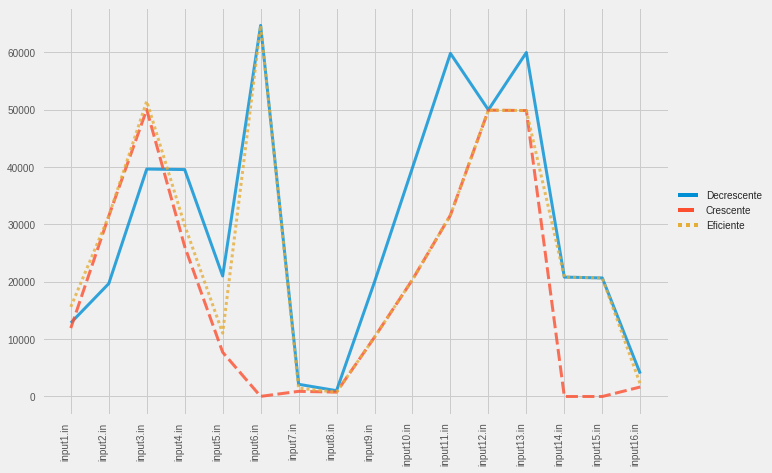

In [46]:
plt.figure(figsize=(10,7)) #(largura,altura)
sns.lineplot(data=df, lw=3,sort=False, alpha=0.8)
plt.xticks(rotation=90, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.savefig('./fat_knapsack.pdf')

In [47]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Decrescente &  Crescente &  Eficiente \\
\midrule
input1.in  &        12840 &      11928 &      15624 \\
input2.in  &        19687 &      31455 &      31455 \\
input3.in  &        39665 &      50044 &      51508 \\
input4.in  &        39578 &      26157 &      29868 \\
input5.in  &        21019 &       7725 &      11050 \\
input6.in  &        64727 &         22 &      64690 \\
input7.in  &         2129 &        898 &       1452 \\
input8.in  &         1017 &        761 &        761 \\
input9.in  &        19976 &      10341 &      10341 \\
input10.in &        39897 &      20378 &      20378 \\
input11.in &        59836 &      31633 &      31633 \\
input12.in &        49988 &      49938 &      49938 \\
input13.in &        59990 &      49871 &      49871 \\
input14.in &        20820 &          0 &      20820 \\
input15.in &        20676 &          0 &      20676 \\
input16.in &         3995 &       1657 &       2152 \\
\bottomrule
\end{tabular}



## **Adicionando os resultados exatos**

In [48]:
exact =[('input15.in', 20676, '5.5823'), ('input7.in', 1940, '0.84025'), ('input1.in', 31621, '0.40869'), ('input3.in', 143449, '2.81'), ('input11.in', 30001, '8.4843'), ('input12.in', 49885, '2343.9'), ('input9.in', 10281, '13.927'), ('input8.in', 741, '0.56339'), ('input14.in', 20880, '519.17'), ('input6.in', 99861, '33.931'), ('input5.in', 15785, '2.7625'), ('input2.in', 67829, '1.1453'), ('input16.in', 46281, '5.5514'), ('input10.in', 20149, '5.6126'), ('input13.in', 49398, '1041.3'), ('input4.in', 28840, '2.7862')]

In [49]:
exact.sort(key=lambda x:int(x[0].strip('input.in')))

In [50]:
exact

[('input1.in', 31621, '0.40869'),
 ('input2.in', 67829, '1.1453'),
 ('input3.in', 143449, '2.81'),
 ('input4.in', 28840, '2.7862'),
 ('input5.in', 15785, '2.7625'),
 ('input6.in', 99861, '33.931'),
 ('input7.in', 1940, '0.84025'),
 ('input8.in', 741, '0.56339'),
 ('input9.in', 10281, '13.927'),
 ('input10.in', 20149, '5.6126'),
 ('input11.in', 30001, '8.4843'),
 ('input12.in', 49885, '2343.9'),
 ('input13.in', 49398, '1041.3'),
 ('input14.in', 20880, '519.17'),
 ('input15.in', 20676, '5.5823'),
 ('input16.in', 46281, '5.5514')]

In [51]:
result_exact = list(map(lambda value:value[1], exact))

In [52]:
result_exact

[31621,
 67829,
 143449,
 28840,
 15785,
 99861,
 1940,
 741,
 10281,
 20149,
 30001,
 49885,
 49398,
 20880,
 20676,
 46281]

In [53]:
df

,Decrescente,Crescente,Eficiente
input1.in,12840,11928,15624
input2.in,19687,31455,31455
input3.in,39665,50044,51508
input4.in,39578,26157,29868
input5.in,21019,7725,11050
input6.in,64727,22,64690
input7.in,2129,898,1452
input8.in,1017,761,761
input9.in,19976,10341,10341
input10.in,39897,20378,20378


In [54]:
df['Exato'] = result_exact

In [55]:
df

,Decrescente,Crescente,Eficiente,Exato
input1.in,12840,11928,15624,31621
input2.in,19687,31455,31455,67829
input3.in,39665,50044,51508,143449
input4.in,39578,26157,29868,28840
input5.in,21019,7725,11050,15785
input6.in,64727,22,64690,99861
input7.in,2129,898,1452,1940
input8.in,1017,761,761,741
input9.in,19976,10341,10341,10281
input10.in,39897,20378,20378,20149


<Figure size 720x504 with 0 Axes>

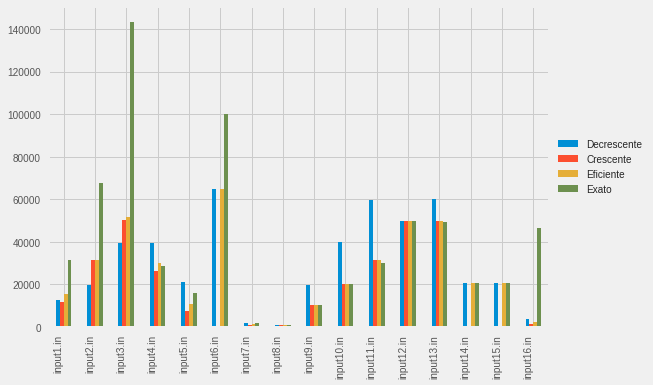

In [79]:
plt.figure(figsize=(10,7))
df.plot(kind='bar',lw=2.5,sort_columns=False)
plt.xticks(rotation=90, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

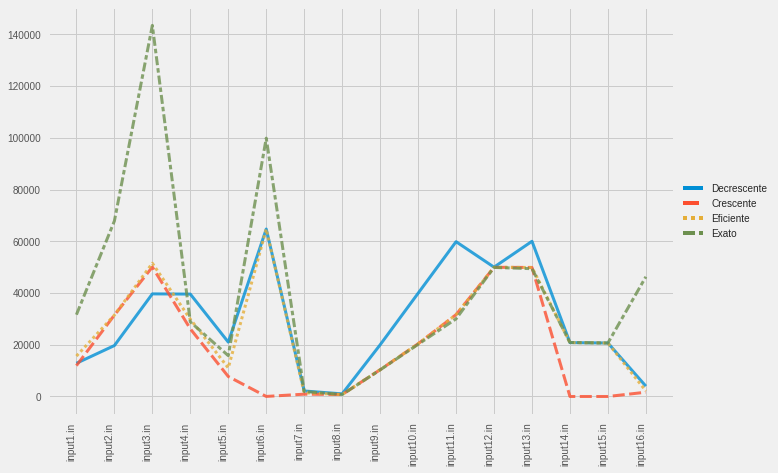

In [80]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, lw=3,sort=False, alpha=0.8)
plt.xticks(rotation=90, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

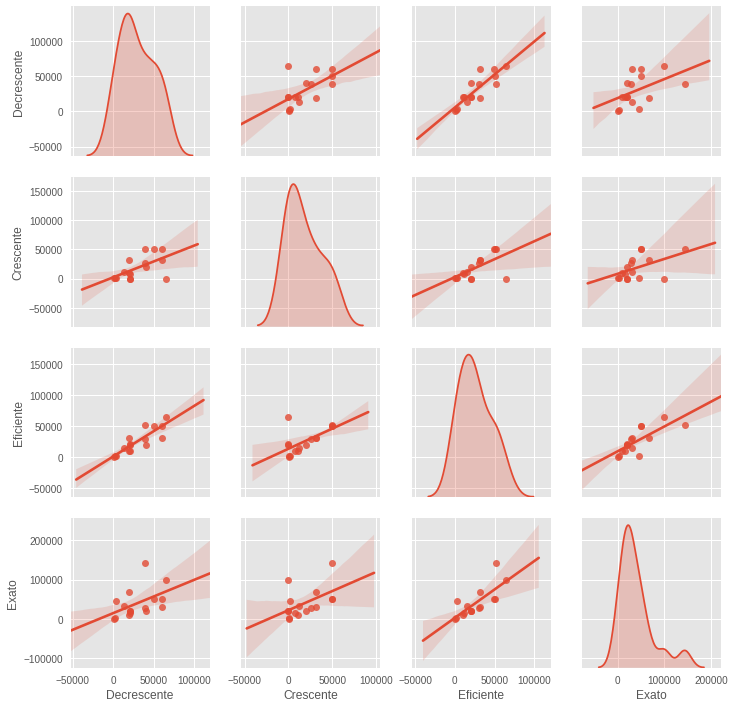

In [69]:
# plt.style.use('seaborn')
# plt.style.use('bmh')
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
sns.pairplot(df,diag_kind="kde", kind="reg", palette='rainbow')